# Imports

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Carregar Dados

In [ ]:
path = pathlib.Path.cwd().parent / "data" / "aerogerador.dat"

df = pd.read_csv(
    path,
    sep=r"\s+",
    header=None,
    names=["velocidade_vento", "potencia_gerada"],
)

df.sample(5)

,velocidade_vento,potencia_gerada
1076,8.8,262
112,7.0,154
1621,9.9,340
1694,10.2,376
1948,11.2,456


# Gráfico de Dispersão

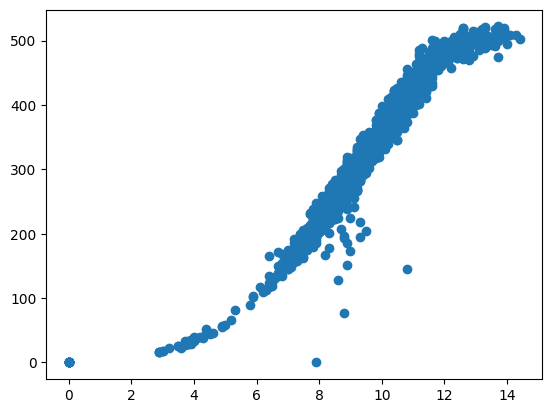

In [7]:
plt.scatter(df["velocidade_vento"], df["potencia_gerada"])

- Adicionar análise sobre os dados

# Separação dos Dados

In [8]:
features = df[["velocidade_vento"]]
target = df["potencia_gerada"]

# Modelo

In [9]:
mse_scores = []
mae_scores = []

i = 500

for j in range(i):
    print(f"\rIteração {j + 1}/{i}", end="")

    # Separar dados entre treino e teste
    X_treino, X_teste, y_treino, y_teste = train_test_split(
        features, target, test_size=0.2, random_state=None
    )

    # Treinar modelo
    reg = LinearRegression().fit(X_treino, y_treino)

    # Testar modelo
    y_pred = reg.predict(X_teste)

    # Avaliar modelo
    mse = mean_squared_error(y_teste, y_pred)
    mae = mean_absolute_error(y_teste, y_pred)

    # Adicionar métricas em array
    mse_scores.append(mse)
    mae_scores.append(mae)

Iteração 500/500

# Calcular Métricas

In [10]:
# Média
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)

# Desvio Padrão
std_mse = np.std(mse_scores)
std_mae = np.std(mae_scores)

# Valor Máximo
max_mse = np.max(mse_scores)
max_mae = np.max(mae_scores)

# Valor Mínimo
min_mse = np.min(mse_scores)
min_mae = np.min(mae_scores)

In [11]:
# Crie um dataframe com os resultados
dados = {
    "Métrica": ["MSE", "MAE"],
    "Média": [mean_mse, mean_mae],
    "Desvio Padrão": [std_mse, std_mae],
    "Valor Máximo": [max_mse, max_mae],
    "Valor Mínimo": [min_mse, min_mae],
}

df_resultados = pd.DataFrame(dados).set_index("Métrica")
df_resultados.index.name = None
print(df_resultados)

          Média  Desvio Padrão  Valor Máximo  Valor Mínimo
MSE  789.454438     159.773160   1291.912156    431.068140
MAE   18.344622       0.782364     20.405431     16.370318
